In [1]:
!conda info --envs

# conda environments:
#
                         /Users/titai/Library/r-miniconda
                         /Users/titai/Library/r-miniconda/envs/r-reticulate
base                     /Users/titai/miniconda3
annovar                  /Users/titai/miniconda3/envs/annovar
bs                       /Users/titai/miniconda3/envs/bs
celloracle_py3.9.16      /Users/titai/miniconda3/envs/celloracle_py3.9.16
pcpp                     /Users/titai/miniconda3/envs/pcpp
pyscenic                 /Users/titai/miniconda3/envs/pyscenic
scvi                  *  /Users/titai/miniconda3/envs/scvi



In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
expression = pd.read_csv("lip_expression_major_df.csv", index_col=0)

In [6]:
expression.head()

,ect,mes,endo
mouse_gene,,,
Xkr4,0.003775,0.000553,0.000000
Sox17,0.003775,0.004747,0.743362
Gm37323,0.000540,0.000221,0.001593
Mrpl15,0.748416,0.774226,0.797932
Lypla1,0.451804,0.449392,0.538874


In [7]:
endo = expression["endo"]

In [10]:
len(endo)

18245

(array([1.5751e+04, 1.5310e+03, 5.1500e+02, 2.1300e+02, 8.7000e+01,
        4.3000e+01, 4.9000e+01, 4.4000e+01, 1.0000e+01, 2.0000e+00]),
 array([0.        , 0.48806105, 0.9761221 , 1.46418315, 1.9522442 ,
        2.44030525, 2.9283663 , 3.41642735, 3.9044884 , 4.39254945,
        4.8806105 ]),
 <BarContainer object of 10 artists>)

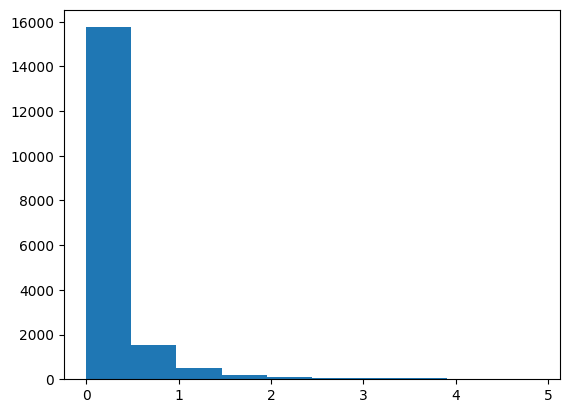

In [9]:
plt.hist(endo)

In [16]:
expression["mouse_gene"] = expression.index

In [17]:
expression = expression.reset_index(drop=True)

In [18]:
expression

,ect,mes,endo,mouse_gene
0,0.003775,0.000553,0.000000,Xkr4
1,0.003775,0.004747,0.743362,Sox17
2,0.000540,0.000221,0.001593,Gm37323
3,0.748416,0.774226,0.797932,Mrpl15
4,0.451804,0.449392,0.538874,Lypla1
...,...,...,...,...
18240,0.000000,0.000443,0.000000,AC132444.6
18241,0.002698,0.000664,0.000000,AC168977.1
18242,0.319631,0.216290,0.153380,PISD
18243,0.196124,0.182292,0.219508,DHRSX


In [19]:
df = pd.merge(expression, cleft, on = "mouse_gene", how = "inner")

In [20]:
df.columns

Index(['ect', 'mes', 'endo', 'mouse_gene', 'Unnamed: 0_x', 'human_gene',
       'Class', 'Unnamed: 0_y'],
      dtype='object')

In [21]:
df.index = df["mouse_gene"]
df.index.name = None

In [22]:
df = df[["Class", "human_gene",'ect', 'mes', 'endo']]

In [23]:
df.Class.value_counts()

Class
omim    58
dnv     21
Name: count, dtype: int64

In [24]:
df = df[(df.Class == "omim") | (df.Class == "dnv")]

In [25]:
df[df.Class == "dnv"]

,Class,human_gene,ect,mes,endo
Cps1,dnv,CPS1,0.000540,0.000885,0.000000
Myo3a,dnv,MYO3A,0.001080,0.000111,0.000000
Hspa5,dnv,HSPA5,1.698834,1.826327,2.006796
Ttn,dnv,TTN,0.004313,0.001438,0.001593
Macf1,dnv,MACF1,0.694855,0.718248,0.966599
Ptprz1,dnv,PTPRZ1,0.134769,0.069047,0.009518
Tenm4,dnv,TENM4,0.394477,0.520775,0.082567
Pkp3,dnv,PKP3,0.292981,0.010786,0.018946
Syne1,dnv,SYNE1,0.025079,0.094439,0.079628
Efnb2,dnv,EFNB2,0.406424,0.224811,0.337663


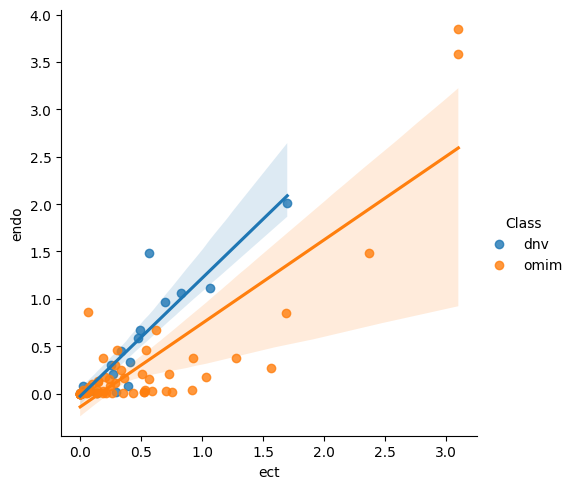

In [36]:
a = sns.lmplot(x="ect", y="endo", hue="Class", data=df)
plt.savefig('ect_endo.jpg')

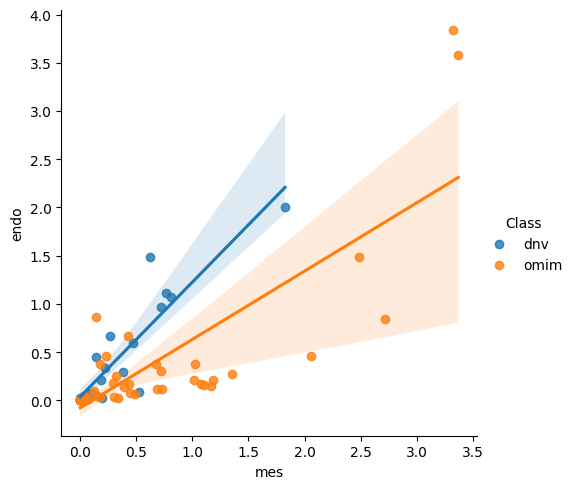

In [37]:
b = sns.lmplot(x="mes", y="endo", hue="Class", data=df)
plt.savefig('mes_endo.jpg')

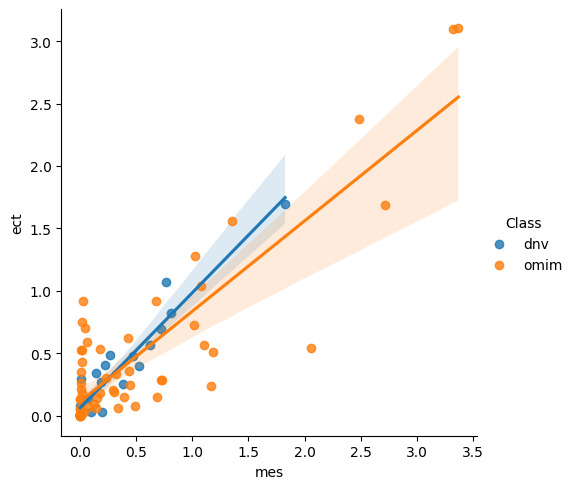

In [38]:
c = sns.lmplot(x="mes", y="ect", hue="Class", data=df)
plt.savefig('mes_ect.jpg')

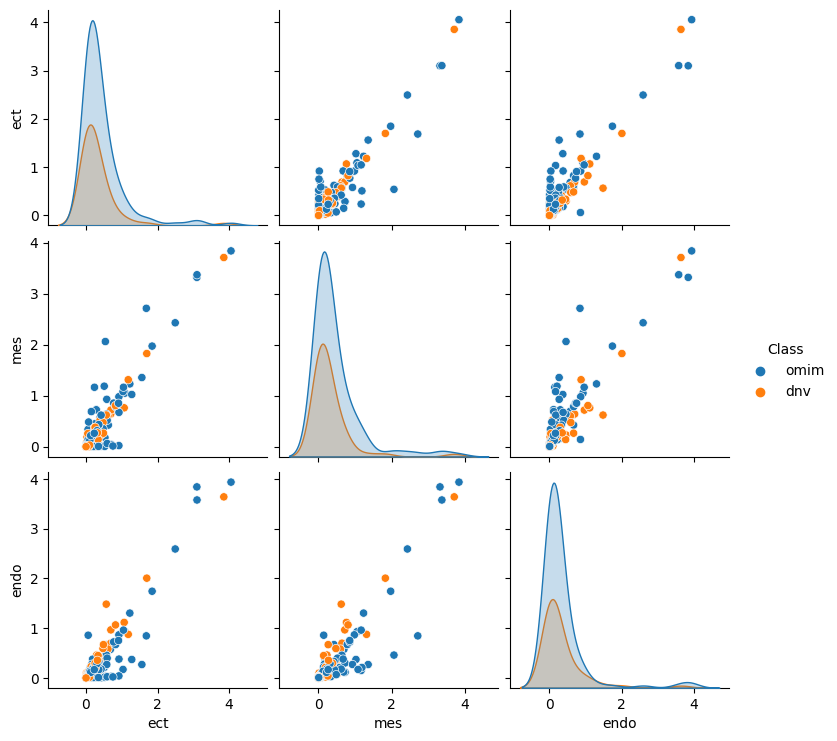

In [67]:
sns.pairplot(df, hue='Class')

In [59]:
df = df[(df.ect < 2) & (df.mes < 2) & (df.endo < 2)]

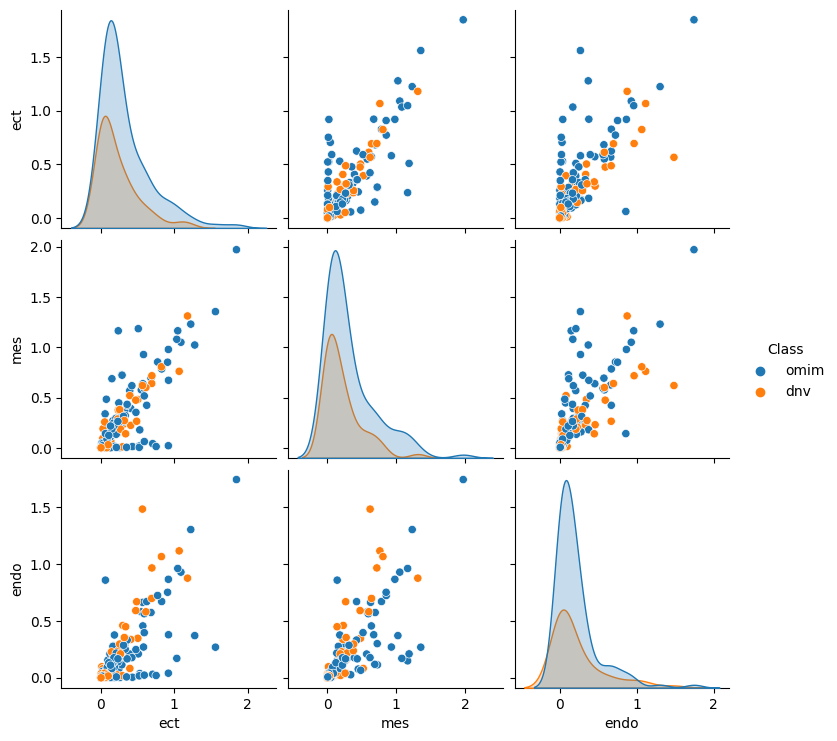

In [60]:
sns.pairplot(df, hue='Class')

In [38]:
df = df[(df.ect < 1) & (df.mes < 1) & (df.endo < 1)]

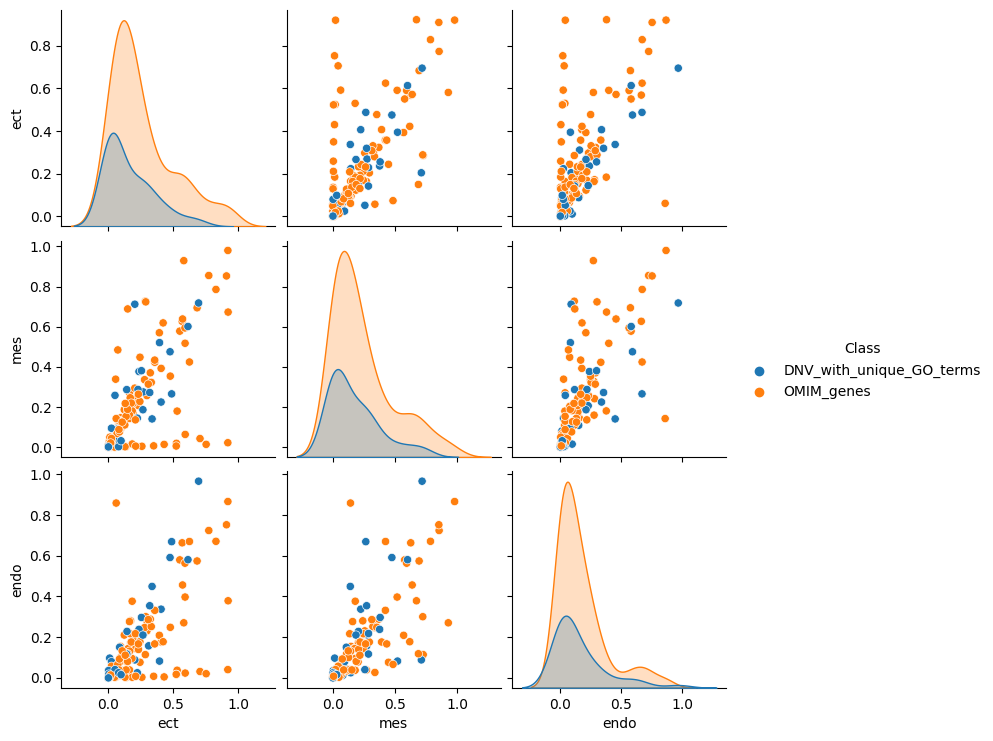

In [39]:
sns.pairplot(df, hue='Class')